In [1]:
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import math

Xshape: torch.Size([300, 1]) 
 Yshape: torch.Size([300, 1])


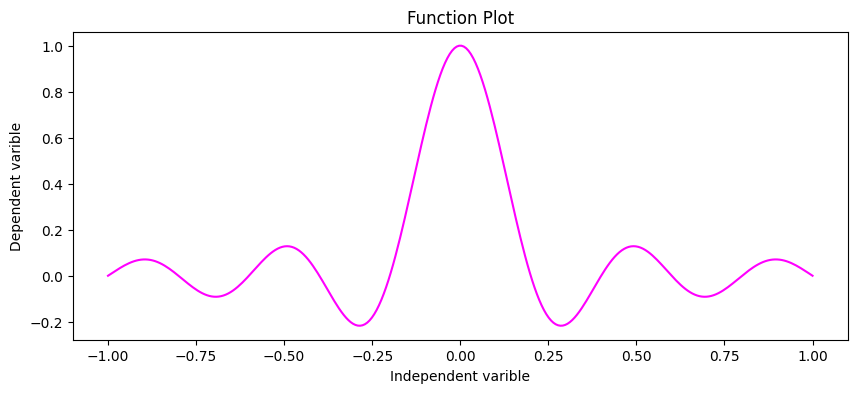

In [3]:
torch.manual_seed(1) 
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)  
y = (np.sin(5*np.pi*x))/(5*np.pi*x) 

print('Xshape:',x.shape,"\n Yshape:",y.shape)

x, y = x.clone().detach().float(), y.clone().detach().float()


plt.figure(figsize=(10,4))
plt.plot(x, y, color = "magenta")
plt.title('Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('funcplt.png')

plt.show()

n_samples, n_features = x.shape

In [4]:
class M1(nn.Module):
    def __init__(self,):
        super(M1, self).__init__()
        self.fc1 = nn.Linear(1, 500)
        self.fc2 = nn.Linear(500, 1)

    def forward(self, x): 
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [5]:
def trainFunc(model,x,y):
    max_epoch = 3000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    gradArr = []
    while not_converged:
        epoch += 1
        prediction = model(x)    
        loss = loss_func(prediction, y)     
        optimizer.zero_grad()  
        loss.backward()        
     
        
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())

        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        

        optimizer.step() 
        
        gradArr.append(grad_norm)
        
        if epoch%100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}, grad_norm = {grad_norm}') #, weight = {model.weight.item()},  bias ={model.bias.item()}')
                
        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False
        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergeance reached for loss:",loss_arr[-1])
                not_converged = False
        
        
                
    return epoch_arr,loss_arr,prediction,grad_norm,gradArr

In [6]:
torch.manual_seed(1)
m1 = M1()     
optimizer = torch.optim.Adam(m1.parameters(), lr=1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  

a=[]
for i in m1.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 1:', np.sum(a),)


Total no of parameters in Model 1: 1501


In [7]:
M1epoch_arr,M1loss_arr,M1prediction,M1grad_norm,M1gradArr = trainFunc(m1,x,y)

epoch: 100, loss = 0.0518, grad_norm = 0.042833150984793775
epoch: 200, loss = 0.0310, grad_norm = 0.03160978400129645
epoch: 300, loss = 0.0158, grad_norm = 0.020887924259005607
epoch: 400, loss = 0.0092, grad_norm = 0.012141426939144905
epoch: 500, loss = 0.0066, grad_norm = 0.007933024045467191
epoch: 600, loss = 0.0053, grad_norm = 0.005805528823791647
epoch: 700, loss = 0.0045, grad_norm = 0.004790601101965509
epoch: 800, loss = 0.0038, grad_norm = 0.004200747342553714
epoch: 900, loss = 0.0032, grad_norm = 0.0038845424542401277
epoch: 1000, loss = 0.0027, grad_norm = 0.003733762529179557
epoch: 1100, loss = 0.0023, grad_norm = 0.028939215876458223
epoch: 1200, loss = 0.0020, grad_norm = 0.01829530427960259
epoch: 1300, loss = 0.0017, grad_norm = 0.018356204775715736
epoch: 1400, loss = 0.0015, grad_norm = 0.03131428175634073
epoch: 1500, loss = 0.0014, grad_norm = 0.011024878803454609
epoch: 1600, loss = 0.0012, grad_norm = 0.0023779300026657776
epoch: 1700, loss = 0.0011, grad_n

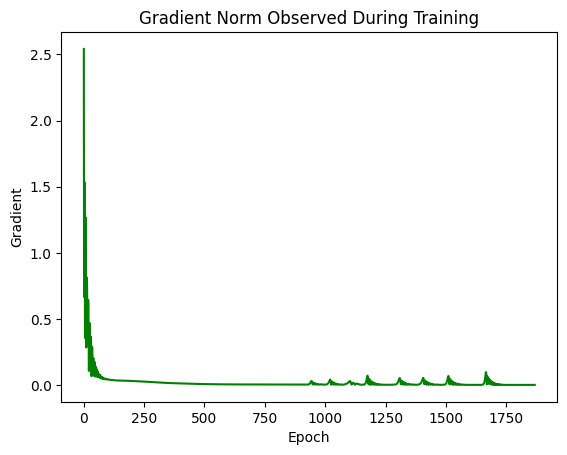

In [9]:
plt.plot(M1epoch_arr,M1gradArr,color="green")
plt.title('Gradient Norm Observed During Training')
plt.xlabel("Epoch")
plt.ylabel("Gradient")
plt.show()

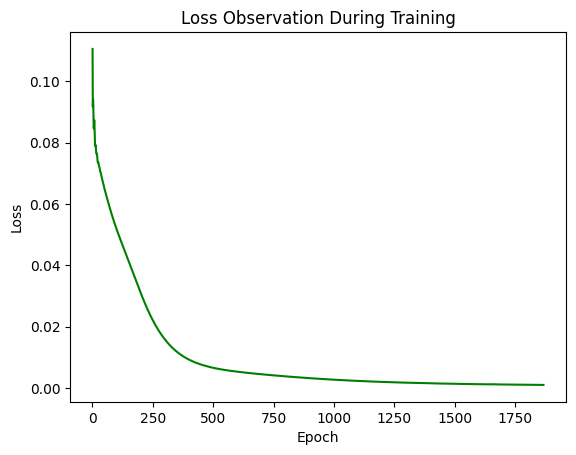

In [10]:
plt.plot(M1epoch_arr,M1loss_arr,color="green")
plt.title('Loss Observation During Training')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()